# Data exploration

In [29]:
%reload_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.append('../')

In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import plotly
import netCDF4 as nc 


In [7]:
import os
data_source = '../demo_data/'
data_files = os.listdir(data_source)


In [9]:
netcdf_file = nc.Dataset(data_source + data_files[0], 'r')

In [5]:
print("File format: ", netcdf_file.file_format)
print("File dimensions: ", netcdf_file.dimensions)
print("File variables: ", netcdf_file.variables)
print("File global attributes: ", netcdf_file.__dict__)

File format:  NETCDF4
File dimensions:  {'time': "<class 'netCDF4.Dimension'>": name = 'time', size = 744, 'latitude': "<class 'netCDF4.Dimension'>": name = 'latitude', size = 229, 'longitude': "<class 'netCDF4.Dimension'>": name = 'longitude', size = 305}
File variables:  {'time': <class 'netCDF4.Variable'>
int64 time(time)
    units: hours since 1900-01-01
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (744,)
filling on, default _FillValue of -9223372036854775806 used, 'latitude': <class 'netCDF4.Variable'>
float32 latitude(latitude)
    _FillValue: nan
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (229,)
filling on, 'longitude': <class 'netCDF4.Variable'>
float32 longitude(longitude)
    _FillValue: nan
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (305,)
filling on, 'height': <class 'netCDF4.Variable'>
float64 height()
    _FillValue: nan
unlimited dimensions: 
current shap

In [10]:
for file in data_files:
    netcdf_file = nc.Dataset(data_source + file, 'r')
    print("===============================")
    for var_name, dimension in netcdf_file.variables.items():
        print("Variable name: ", var_name)
        print("Variable dimensions: ", dimension.dimensions)
        print("Variable attributes: ", dimension.__dict__)
        print("Variable shape: ", dimension.shape)
        print("Variable data type: ", dimension.dtype)
    netcdf_file.close()
        # print("Variable data: ", dimension[:])
        # print("\n")
        # try:
        #     print("Sample data: ", dimension[:5])
        # except:
        #     print("No sample data available.")

Variable name:  time
Variable dimensions:  ('time',)
Variable attributes:  {'units': 'hours since 1900-01-01', 'calendar': 'proleptic_gregorian'}
Variable shape:  (744,)
Variable data type:  int64
Variable name:  latitude
Variable dimensions:  ('latitude',)
Variable attributes:  {'_FillValue': nan, 'units': 'degrees_north', 'long_name': 'latitude'}
Variable shape:  (229,)
Variable data type:  float32
Variable name:  longitude
Variable dimensions:  ('longitude',)
Variable attributes:  {'_FillValue': nan, 'units': 'degrees_east', 'long_name': 'longitude'}
Variable shape:  (305,)
Variable data type:  float32
Variable name:  height
Variable dimensions:  ()
Variable attributes:  {'_FillValue': nan}
Variable shape:  ()
Variable data type:  float64
Variable name:  ws100
Variable dimensions:  ('time', 'latitude', 'longitude')
Variable attributes:  {'_FillValue': -32767, 'coordinates': 'height', 'add_offset': 20.669057846069336, 'scale_factor': 0.0006308080890578446}
Variable shape:  (744, 229,

In [11]:
data = xr. open_dataset(data_source + data_files[0])
print(data)


<xarray.Dataset> Size: 416MB
Dimensions:    (time: 744, latitude: 229, longitude: 305)
Coordinates:
  * time       (time) datetime64[ns] 6kB 2026-05-01 ... 2026-05-31T23:00:00
  * latitude   (latitude) float32 916B 75.0 74.75 74.5 74.25 ... 18.5 18.25 18.0
  * longitude  (longitude) float32 1kB -31.0 -30.75 -30.5 ... 44.5 44.75 45.0
    height     float64 8B ...
Data variables:
    ws100      (time, latitude, longitude) float64 416MB ...


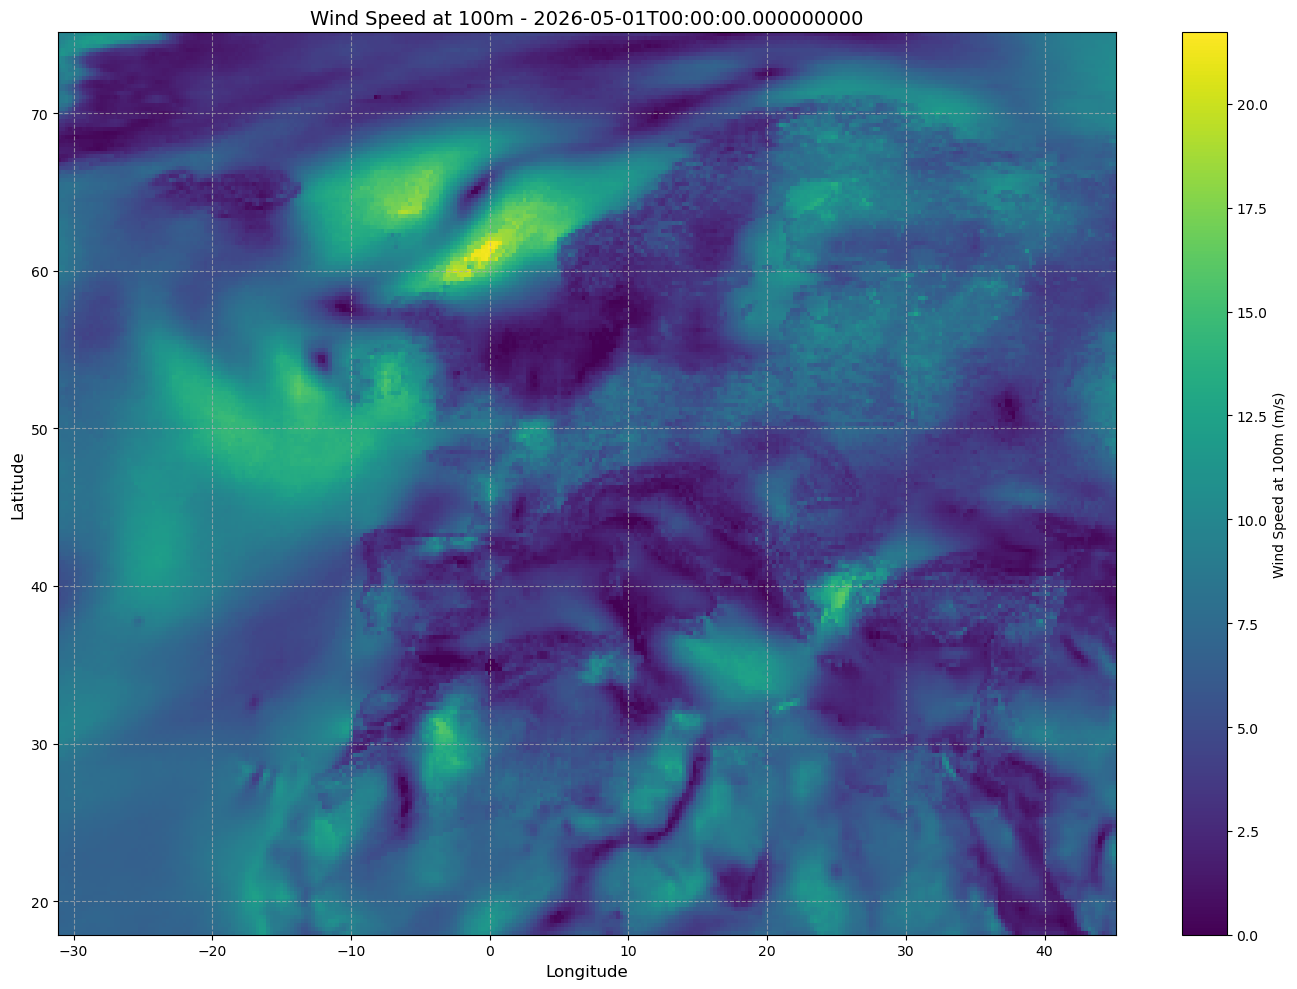

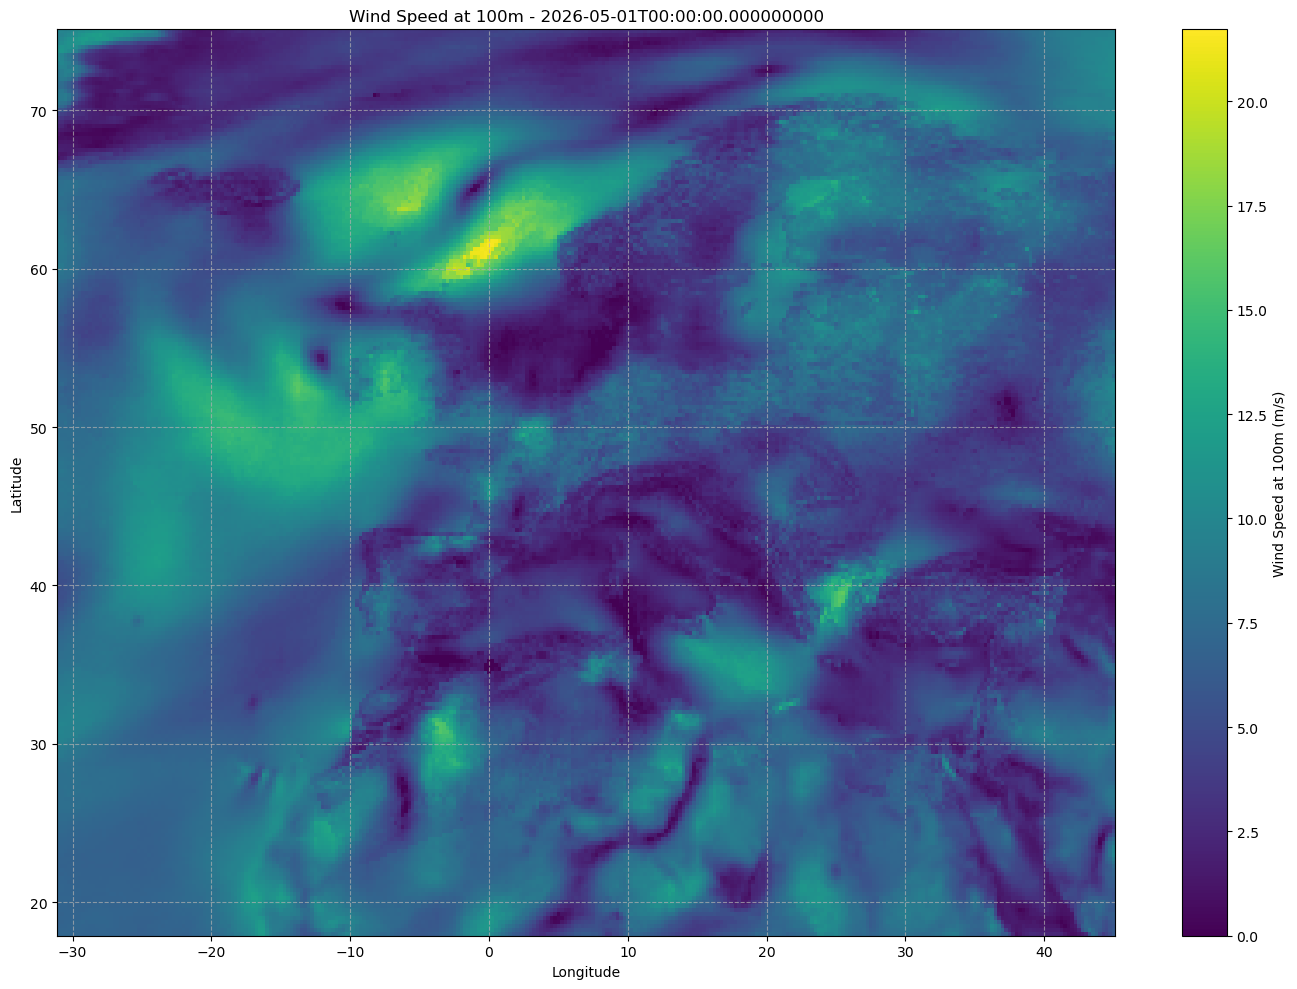

In [12]:

from matplotlib.colors import TwoSlopeNorm

# Load your dataset
# data = xr.open_dataset('your_file.nc')

# Create a better visualization of a single time slice
plt.figure(figsize=(14, 10))

# Select a specific time (e.g., first time step)
time_index = 0
time_slice = data.ws100.isel(time=time_index)

# Get the data for plotting
lons = data.longitude.values
lats = data.latitude.values
wind_data = time_slice.values

# Create a nice colormap
cmap = plt.cm.viridis

# Plot as an image
im = plt.pcolormesh(lons, lats, wind_data, cmap=cmap, shading='auto')
plt.colorbar(im, label='Wind Speed at 100m (m/s)')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels
plt.title(f'Wind Speed at 100m - {data.time.values[time_index]}', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Improve the appearance
plt.tight_layout()
plt.show()

# You can also create an animation without cartopy
from matplotlib.animation import FuncAnimation

fig, ax = plt.figure(figsize=(14, 10)), plt.axes()
ax.grid(True, linestyle='--', alpha=0.7)

# Initial plot with first time step
im = ax.pcolormesh(lons, lats, data.ws100.isel(time=0).values, 
                  cmap=cmap, shading='auto')
fig.colorbar(im, ax=ax, label='Wind Speed at 100m (m/s)')

title = ax.set_title(f'Wind Speed at 100m - {data.time.values[0]}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Update function for animation
def update(frame):
    im.set_array(data.ws100.isel(time=frame).values.flatten())
    title.set_text(f'Wind Speed at 100m - {data.time.values[frame]}')
    return [im]

# Create animation (use fewer frames for speed)
anim = FuncAnimation(
    fig, update, frames=range(0, len(data.time), 24),  # Every 24 hours
    blit=True
)

plt.tight_layout()
plt.show()

Label(value='2026-05-01T00:00:00.000000000')

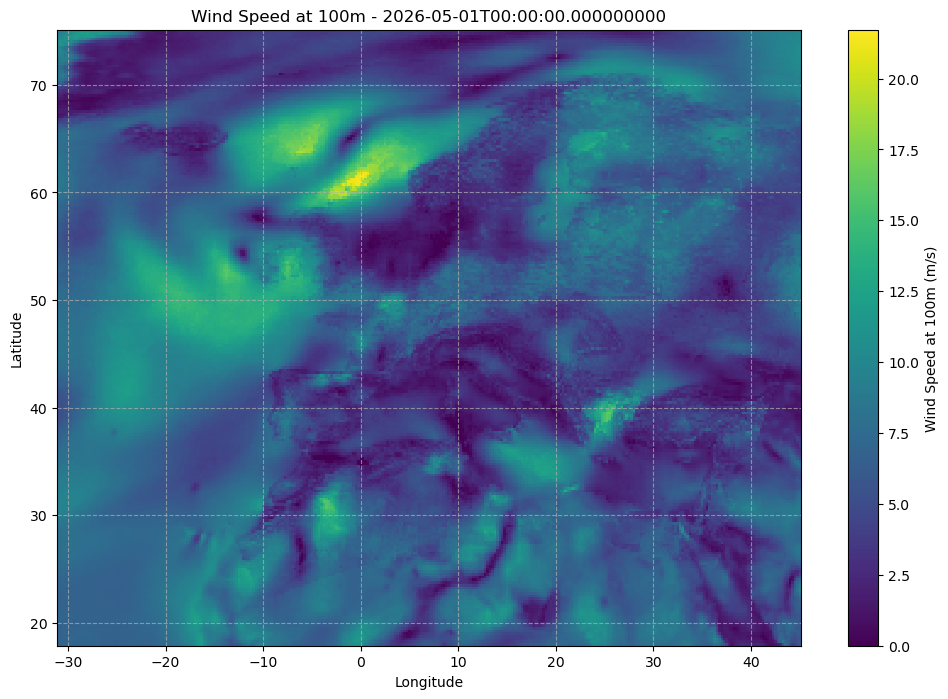

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from matplotlib.backends.backend_nbagg import FigureCanvasNbAgg

# Make sure matplotlib uses the right backend
%matplotlib inline

# Assuming you have data loaded
# Take only the first 5 time steps
subset_data = data.isel(time=slice(0, 48))

# Create figure and initial plot
fig, ax = plt.subplots(figsize=(12, 8))

# Get the longitude and latitude values
lons = data.longitude.values
lats = data.latitude.values

# Initial plot with first time step
wind_data = subset_data.ws100.isel(time=0).values
im = ax.pcolormesh(lons, lats, wind_data, cmap='viridis', shading='auto')
cbar = fig.colorbar(im, ax=ax, label='Wind Speed at 100m (m/s)')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

title = ax.set_title(f'Wind Speed at 100m - {subset_data.time.values[0]}')

# Create time slider widget
time_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=47,  # 5 time steps (0-4)
    step=1,
    description='Time step:',
    continuous_update=False,
    layout=widgets.Layout(width='800px')
)

# Time step labels for the slider
time_labels = {i: str(time.values) for i, time in enumerate(subset_data.time)}
time_label = widgets.Label(value=time_labels[0])

# Function to update plot when slider changes
def update_plot(change):
    time_idx = change['new']
    wind_data = subset_data.ws100.isel(time=time_idx).values
    
    # Update the plot data
    im.set_array(wind_data.flatten())
    
    # Update colorbar limits if needed
    vmin = wind_data.min()
    vmax = wind_data.max()
    im.set_clim(vmin, vmax)
    
    # Update title with timestamp
    title.set_text(f'Wind Speed at 100m - {subset_data.time.values[time_idx]}')
    
    # Update the time label
    time_label.value = time_labels[time_idx]
    
    fig.canvas.draw_idle()

# Register the callback
time_slider.observe(update_plot, names='value')

# Create a play button for animation
play_button = widgets.Play(
    value=0,
    min=0,
    max=47,
    step=1,
    interval=1000,  # milliseconds between frames
    description="Play",
    disabled=False
)

# Link the play button to the slider
widgets.jslink((play_button, 'value'), (time_slider, 'value'))

# Layout the controls
controls = widgets.HBox([play_button, time_slider])
display(controls)
display(time_label)
plt.show()